<a href="https://colab.research.google.com/github/shannuvision/flipkartgrid/blob/main/Flipkartgridfreshness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [18]:

import os
import cv2
import numpy as np
import pickle
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Activation, MaxPooling2D, Dropout, Flatten, Dense
from tqdm import tqdm
import matplotlib.pyplot as plt

Defining paths to images

In [56]:
fresh_images = ['/content/applefresh.jpg', '/content/bananafresh.jpg', '/content/bananafresh1.jpg']
rotten_images = ['/content/applerotten.jpg', '/content/bananarotten.jpg']
all_images =  ['/content/applerotten.jpg', '/content/bananarotten.jpg']
image_test=['/content/applefresh.jpg', '/content/bananafresh.jpg', '/content/bananafresh1.jpg']

 Prepare image function

In [6]:
def prepare(filepath):
    IMG_SIZE = 50
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)


Create dataset

In [7]:
X = []
y = []

In [8]:
for img_path in tqdm(all_images):
    X.append(prepare(img_path))
    label = 1 if img_path in rotten_images else 0  # 1 for rotten, 0 for fresh
    y.append(label)

X = np.array(X).reshape(-1, 50, 50, 1) / 255.0
y = np.array(y)


100%|██████████| 5/5 [00:00<00:00, 75.38it/s]


 Define the model

In [9]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128))
model.add(Dropout(0.25))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Train the model

In [10]:
model.fit(X, y, batch_size=2, epochs=5, validation_split=0.3)

Epoch 1/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 164ms/step - accuracy: 0.2222 - loss: 0.6883 - val_accuracy: 0.0000e+00 - val_loss: 3.4517
Epoch 2/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 1.0000 - loss: 0.0120 - val_accuracy: 0.0000e+00 - val_loss: 8.5863
Epoch 3/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 1.0000 - loss: 1.9474e-04 - val_accuracy: 0.0000e+00 - val_loss: 14.4367
Epoch 4/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 1.0000 - loss: 1.3479e-07 - val_accuracy: 0.0000e+00 - val_loss: 20.3626
Epoch 5/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 1.0000 - loss: 1.5088e-10 - val_accuracy: 0.0000e+00 - val_loss: 26.0682


In [15]:
def prepare(filepath):
    IMG_SIZE = 50
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    if img_array is None:
        print(f"Error: Unable to load image at {filepath}")
        return None  # Or handle this case appropriately
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)


 Testing function

In [54]:
def test_model(image_paths):
    for img_path in image_paths:
        prepared_image = prepare(img_path)
        if prepared_image is None:
            continue  # Skip this image if it couldn't be loaded
        prediction = model.predict(prepared_image)
        result = "Rotten" if prediction[0][0] <= 0.0 else "Fresh"
        if result=="Rotten":
          print("freshness value: 0")
        else:
          print("freshness value: 1")
        # Display the image and the prediction
        img = cv2.imread(img_path)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title(f"Predicted: {result}")
        plt.axis('off')
        plt.show()

Test with images

freshness value for rotten : 0 , fresh : 1



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
freshness value: 0


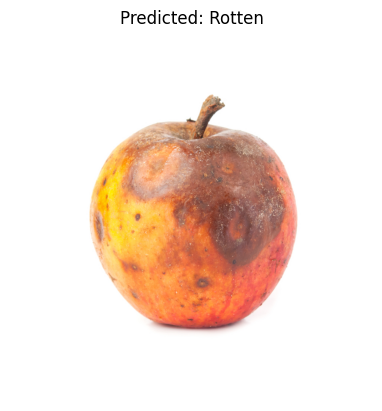

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
freshness value: 0


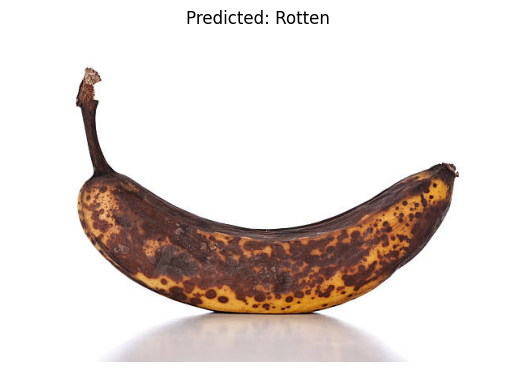

In [55]:
test_model(all_images)